In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns




### The data has the following two files:
 
A user file ("takehome_users") with data on 12,000 users who signed up for the product in the last two years. This table includes:
name: the user's name
object_id: the user's id
email: email address
email_domain: domain of email address, e.g. gmail.com
creation_source: how they signed up for the product. This takes on one of 5 values:
PERSONAL_PROJECTS: invited to join another user's personal workspace
GUEST_INVITE: invited to an organization as a guest (limited permissions)
ORG_INVITE: invited to an organization (as a full member)
SIGNUP: signed up via asana.com
SIGNUP_GOOGLE_AUTH: signed up using Google
Authentication (using a Google email account for their login id)
creation_time: when they created their account
last_session_creation_time: unix timestamp of last login
opted_in_to_mailing_list: whether they have opted into receiving marketing emails
enabled_for_marketing_drip: whether they are on the regular marketing email drip
org_id: the organization (group of users) they belong to
invited_by_user_id: which user invited them to join (if applicable).
 
A usage summary file ("takehome_user_engagement") that has a row for each day that a user logged into the product.
 
We define an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period.

We  suggest  spending  1-2  hours  on  this,  but  you're  welcome  to  spend  more  or  less.
Please  send  us  a  brief  writeup  of  your  findings  (the  more  concise,  the  better no  more
than  one  page),  along  with  any  summary  tables,  graphs,  code,  or  queries  that  can  help
us  understand  your  approach.  Please  note  any  factors  you  considered  or  investigation
you  did,  even  if  they  did  not  pan  out.  Feel  free  to  identify  any  further  research  or  data
you  think  would  be  valuable.


### Load the data

In [3]:
engagement = pd.read_csv('C:\\Users\\thiru\\OneDrive\\Documents\\Guvi assignment_Task 5\\takehome_user_engagement.csv',encoding = "ISO-8859-1")
users = pd.read_csv('C:\\Users\\thiru\\OneDrive\\Documents\\Guvi assignment_Task 5\\takehome_users.csv',encoding = "ISO-8859-1")

### Understand the data

In [4]:
engagement.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [7]:
users.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,22-04-2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,15-11-2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,19-03-2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,21-05-2013 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,17-01-2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [9]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


### change the object_id to user_id to make common 

In [10]:
users.rename(columns = {'object_id':'user_id'}, inplace = True)

In [11]:
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,22-04-2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,15-11-2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,19-03-2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,21-05-2013 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,17-01-2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


### Change the time_stamp format in to pandas datetime format

In [12]:
engagement.time_stamp = pd.to_datetime(engagement.time_stamp)


In [13]:
engagement.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


### Using pandas rolling method to get the adopted_user

In [14]:
def rolling_count(df, period):
    return df.rolling(period, on='time_stamp')['user_id'].count()

engagement['visits_7_days'] = engagement.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')


In [15]:
engagement.head(5)

,time_stamp,user_id,visited,visits_7_days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0


In [16]:
engagement_1 = engagement.groupby('user_id')[['visits_7_days']].max()


In [17]:
engagement_1.head()

,visits_7_days
user_id,
1,1.0
2,3.0
3,1.0
4,1.0
5,1.0


In [18]:
engagement_1['visits_7_days'] = engagement_1['visits_7_days'].astype(int)

### Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven day  period

In [19]:
engagement_1.loc[engagement_1['visits_7_days'] >= 3,'adopted_user'] = 1
engagement_1.loc[engagement_1['visits_7_days'] < 3,'adopted_user'] = 0

In [20]:
engagement_1.head(10)

,visits_7_days,adopted_user
user_id,,
1,1,0.0
2,3,1.0
3,1,0.0
4,1,0.0
5,1,0.0
6,1,0.0
7,1,0.0
10,7,1.0
11,1,0.0


In [21]:
engagement_1['visits_7_days'] = engagement_1['visits_7_days'].astype(int)
engagement_1['adopted_user'] = engagement_1['adopted_user'].astype(int)

In [22]:
engagement_1['adopted_user'].value_counts()

0    7221
1    1602
Name: adopted_user, dtype: int64

##Total number of adopted_user: 1602 

In [23]:
engagement_1.head()

,visits_7_days,adopted_user
user_id,,
1,1,0
2,3,1
3,1,0
4,1,0
5,1,0


In [24]:
engagement.head()

,time_stamp,user_id,visited,visits_7_days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0


### Get the first login date of the user

In [25]:
time = engagement.groupby('user_id', as_index = False).agg({'time_stamp' : np.min})
time.head()

,user_id,time_stamp
0,1,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52
3,4,2013-05-22 08:09:28
4,5,2013-01-22 10:14:20


### Merge two dataframe into one

In [26]:
df = users.merge(engagement_1, how = 'left',on = 'user_id',sort = True)


In [27]:
df = df.merge(time,how='left',on = 'user_id',sort = True)

In [28]:
df = df.rename({'time_stamp':'first_login'},axis = 'columns')

In [29]:
df.head(5)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login
0,1,22-04-2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30
1,2,15-11-2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04
2,3,19-03-2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52
3,4,21-05-2013 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28
4,5,17-01-2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  object        
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  visits_7_days               8823 non-null   float64       
 11  adopted_user                8823 non-null   float64   

In [31]:
df.creation_time = pd.to_datetime(df.creation_time)

### the time difference between first_login and creation_time

In [32]:
df['first_login_creation_gap'] = (df['first_login']-df['creation_time']).dt.days

In [33]:
df.head(10)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0
5,6,2013-12-17 03:37:00,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,1.0,0.0,2013-12-19 03:37:06,2.0
6,7,2012-12-16 13:24:00,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,1.0,0.0,2012-12-20 13:24:32,4.0
7,8,2013-07-31 05:34:00,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN,NaN,NaT,NaN
8,9,2013-05-11 04:04:00,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN,NaN,NaT,NaN
9,10,2013-01-16 22:08:00,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,7.0,1.0,2013-01-16 22:08:03,0.0


###  Feature Engineer: Getting the average login time of the user, to have the mean_login_gap_length feature for model

In [34]:
user_login_gap = engagement.groupby('user_id').time_stamp.apply(lambda x: x - x.shift()).dt.days
user_login_gap = pd.DataFrame(user_login_gap)
user_login_gap.columns = ['mean_login_gap_length']
user_login_gap.head()
user_login_gap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 1 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mean_login_gap_length  199094 non-null  float64
dtypes: float64(1)
memory usage: 3.2 MB


In [35]:
user_login_gap.head()

,mean_login_gap_length
0,NaN
1,NaN
2,14.0
3,10.0
4,16.0


In [36]:
engagement = engagement.merge(user_login_gap, left_index = True, right_index = True)
engagement.head()

,time_stamp,user_id,visited,visits_7_days,mean_login_gap_length
0,2014-04-22 03:53:30,1,1,1.0,NaN
1,2013-11-15 03:45:04,2,1,1.0,NaN
2,2013-11-29 03:45:04,2,1,1.0,14.0
3,2013-12-09 03:45:04,2,1,1.0,10.0
4,2013-12-25 03:45:04,2,1,1.0,16.0


In [37]:
gap_mean = engagement.groupby('user_id').agg({'mean_login_gap_length' : np.mean})
gap_mean.head()

,mean_login_gap_length
user_id,
1,NaN
2,10.461538
3,NaN
4,NaN
5,NaN


In [38]:
df = df.merge(gap_mean, how = 'left', on = 'user_id')
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN


### create a new feature of org_id by cluster org_id into different size

In [39]:
df.org_id.value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [40]:
def org_size(x):
    value = 'small'
    if x > 300:
        value = 'Large'
    elif x > 100:
        value = 'medium'
    

    return value

df['org_size'] = df.org_id.apply(org_size)



In [41]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium


In [42]:
df.email.value_counts()

AlfieLane@yahoo.com                 2
LasseLNrgaard@gmail.com             2
AmandaABach@gmail.com               2
PaigeWyatt@gmail.com                2
TomSchiffer@gmail.com               2
                                   ..
RodrigoMartinsOliveira@yahoo.com    1
AidanDanglow@cuvox.de               1
TylerGodfrey@gmail.com              1
AnneJKrogh@gustr.com                1
ThaisMeloLima@hotmail.com           1
Name: email, Length: 11980, dtype: int64

In [43]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium


### Normalizing last creation time

In [44]:
df.last_session_creation_time.head(5)

0    1.398139e+09
1    1.396238e+09
2    1.363735e+09
3    1.369210e+09
4    1.358850e+09
Name: last_session_creation_time, dtype: float64

In [45]:
df['last_session_creation_time'] = df['last_session_creation_time']/(10000000)

In [46]:
df['last_session_creation_time'].head(5)

0    139.813881
1    139.623750
2    136.373489
3    136.921017
4    135.884966
Name: last_session_creation_time, dtype: float64

In [47]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,139.813881,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,139.623750,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,136.373489,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,136.921017,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,135.884966,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium


### The invited_by_user_id, and cluster them into different clusters

In [48]:
df.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
           ..
1390.0      1
5445.0      1
8526.0      1
4695.0      1
5450.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

###  Also cluster the group_size

In [49]:
def group_size(x):
    value = 'small'
    if x > 10:
        value = 'Large'
    elif x > 5:
        value = 'medium'
    
    elif x == 0:
        value = np.nan
    return value

df['group_size'] = df.invited_by_user_id.apply(group_size)

In [50]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size,group_size
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,139.813881,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small,Large
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,139.623750,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small,Large
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,136.373489,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small,Large
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,136.921017,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small,Large
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,135.884966,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium,Large


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,12000.0,6000.500000,3464.245950,1.000000,3000.750000,6000.500000,9000.25000,12000.000000
last_session_creation_time,8823.0,137.927931,1.953116,133.845241,136.319497,138.288847,139.84426,140.206673
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.000000,0.000000,0.000000,0.00000,1.000000
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.000000,0.000000,0.000000,0.00000,1.000000
org_id,12000.0,141.884583,124.056723,0.000000,29.000000,108.000000,238.25000,416.000000
invited_by_user_id,6417.0,5962.957145,3383.761968,3.000000,3058.000000,5954.000000,8817.00000,11999.000000
visits_7_days,8823.0,1.866259,1.812267,1.000000,1.000000,1.000000,1.00000,7.000000
adopted_user,8823.0,0.181571,0.385512,0.000000,0.000000,0.000000,0.00000,1.000000
first_login_creation_gap,8823.0,-1.398617,87.988167,-323.000000,0.000000,0.000000,2.00000,327.000000
mean_login_gap_length,2588.0,7.822104,7.039812,1.000000,3.000000,5.626453,10.00000,60.000000


In [52]:
df.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [53]:
df.adopted_user.value_counts()

0.0    7221
1.0    1602
Name: adopted_user, dtype: int64

In [54]:
df[['user_id','adopted_user']].head(10)

,user_id,adopted_user
0,1,0.0
1,2,1.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,0.0
6,7,0.0
7,8,NaN
8,9,NaN
9,10,1.0


In [55]:
df = df.drop(['user_id','creation_time','name','org_id','invited_by_user_id','visits_7_days','first_login'], axis = 1)

In [56]:
df.head()

,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,org_size,group_size
0,AugustCClausen@yahoo.com,GUEST_INVITE,139.813881,1,0,0.0,0.0,NaN,small,Large
1,MatthewPoole@gustr.com,ORG_INVITE,139.623750,0,0,1.0,0.0,10.461538,small,Large
2,MitchellBottrill@gustr.com,ORG_INVITE,136.373489,0,0,0.0,0.0,NaN,small,Large
3,NicklasSClausen@yahoo.com,GUEST_INVITE,136.921017,0,0,0.0,1.0,NaN,small,Large
4,GraceRaw@yahoo.com,GUEST_INVITE,135.884966,0,0,0.0,5.0,NaN,medium,Large


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
last_session_creation_time,8823.0,137.927931,1.953116,133.845241,136.319497,138.288847,139.84426,140.206673
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.000000,0.000000,0.000000,0.00000,1.000000
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.000000,0.000000,0.000000,0.00000,1.000000
adopted_user,8823.0,0.181571,0.385512,0.000000,0.000000,0.000000,0.00000,1.000000
first_login_creation_gap,8823.0,-1.398617,87.988167,-323.000000,0.000000,0.000000,2.00000,327.000000
mean_login_gap_length,2588.0,7.822104,7.039812,1.000000,3.000000,5.626453,10.00000,60.000000


###  Get dummy variable to covert string to number for modeling

In [58]:
df = pd.get_dummies(df, columns = ['creation_source', 'org_size', 'group_size','email'])

In [59]:
df.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,...,email_zpconale@lupoa.com,email_zqhkgbjr@hmlvw.com,email_zssimlrf@ydtkr.com,email_zttnjetg@bjtrd.com,email_ztusfujm@ieunf.com,email_zvgswfkk@utjmk.com,email_zwicjnqn@ruynp.com,email_zxswdasp@swhrr.com,email_zyxoffkk@vxdvt.com,email_zzxqnoiy@vhugu.com
0,139.813881,1,0,0.0,0.0,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,139.623750,0,0,1.0,0.0,10.461538,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,136.373489,0,0,0.0,0.0,NaN,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,136.921017,0,0,0.0,1.0,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135.884966,0,0,0.0,5.0,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df.describe()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,...,email_zpconale@lupoa.com,email_zqhkgbjr@hmlvw.com,email_zssimlrf@ydtkr.com,email_zttnjetg@bjtrd.com,email_ztusfujm@ieunf.com,email_zvgswfkk@utjmk.com,email_zwicjnqn@ruynp.com,email_zxswdasp@swhrr.com,email_zyxoffkk@vxdvt.com,email_zzxqnoiy@vhugu.com
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,137.927931,0.249500,0.149333,0.133500,-0.763103,7.822104,0.180250,0.354500,0.175917,0.173917,...,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083
std,1.674708,0.432742,0.356432,0.340128,75.453269,3.268788,0.384412,0.478381,0.380765,0.379054,...,0.009129,0.009129,0.009129,0.009129,0.009129,0.009129,0.009129,0.009129,0.009129,0.009129
min,133.845241,0.000000,0.000000,0.000000,-323.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,137.056297,0.000000,0.000000,0.000000,0.000000,7.822104,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,137.927931,0.000000,0.000000,0.000000,1.001813,7.822104,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,139.372857,0.000000,0.000000,0.000000,1.001813,7.822104,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,140.206673,1.000000,1.000000,1.000000,327.000000,60.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Columns: 11997 entries, last_session_creation_time to email_zzxqnoiy@vhugu.com
dtypes: float64(4), int64(2), uint8(11991)
memory usage: 137.9 MB


### Fill the missing value with mean

In [93]:
df.last_session_creation_time = df.last_session_creation_time.fillna(137.927931)
df.adopted_user = df.adopted_user.fillna(0)
df.first_login_creation_gap = df.first_login_creation_gap.fillna(1.001813)
df.mean_login_gap_length = df.mean_login_gap_length.fillna(7.822104)
X = df.drop('adopted_user', axis=1)
y = df['adopted_user']

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Columns: 11997 entries, last_session_creation_time to email_zzxqnoiy@vhugu.com
dtypes: float64(4), int64(2), uint8(11991)
memory usage: 137.9 MB


### Random forest model 

In [65]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [66]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[3402   42]
 [ 109  407]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      3444
         1.0       0.91      0.79      0.84       516

    accuracy                           0.96      3960
   macro avg       0.94      0.89      0.91      3960
weighted avg       0.96      0.96      0.96      3960



=== All AUC Scores ===
[0.98957933 0.99282752 0.98542969 0.98880108 0.98989784 0.98705829
 0.98851863 0.99046274 0.98714722 0.98844446]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9888166796374016


In [80]:
feature_importance = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)

mean_login_gap_length            0.377784
last_session_creation_time       0.236118
first_login_creation_gap         0.027479
opted_in_to_mailing_list         0.003704
enabled_for_marketing_drip       0.003234
                                   ...   
email_OliviaHHolm@yahoo.com      0.000000
email_DitteCRavn@gustr.com       0.000000
email_DitteJJepsen@gmail.com     0.000000
email_DittePLind@gmail.com       0.000000
email_LeahWilkinson@gmail.com    0.000000
Length: 11996, dtype: float64


In [81]:
type(feature_importance)

pandas.core.series.Series

In [96]:
fi = pd.DataFrame(feature_importance)
fi.head(10)

,0
mean_login_gap_length,0.377784
last_session_creation_time,0.236118
first_login_creation_gap,0.027479
opted_in_to_mailing_list,0.003704
enabled_for_marketing_drip,0.003234
org_size_small,0.003056
creation_source_PERSONAL_PROJECTS,0.002358
org_size_medium,0.002014
creation_source_GUEST_INVITE,0.001778
creation_source_SIGNUP_GOOGLE_AUTH,0.001716


In [97]:
fi.columns = ['user']
new_fi = fi.reset_index()


In [98]:
new_fi.columns=['feature','score']


In [104]:
result = new_fi.head(10)

In [105]:
result

,feature,score
0,mean_login_gap_length,0.377784
1,last_session_creation_time,0.236118
2,first_login_creation_gap,0.027479
3,opted_in_to_mailing_list,0.003704
4,enabled_for_marketing_drip,0.003234
5,org_size_small,0.003056
6,creation_source_PERSONAL_PROJECTS,0.002358
7,org_size_medium,0.002014
8,creation_source_GUEST_INVITE,0.001778
9,creation_source_SIGNUP_GOOGLE_AUTH,0.001716


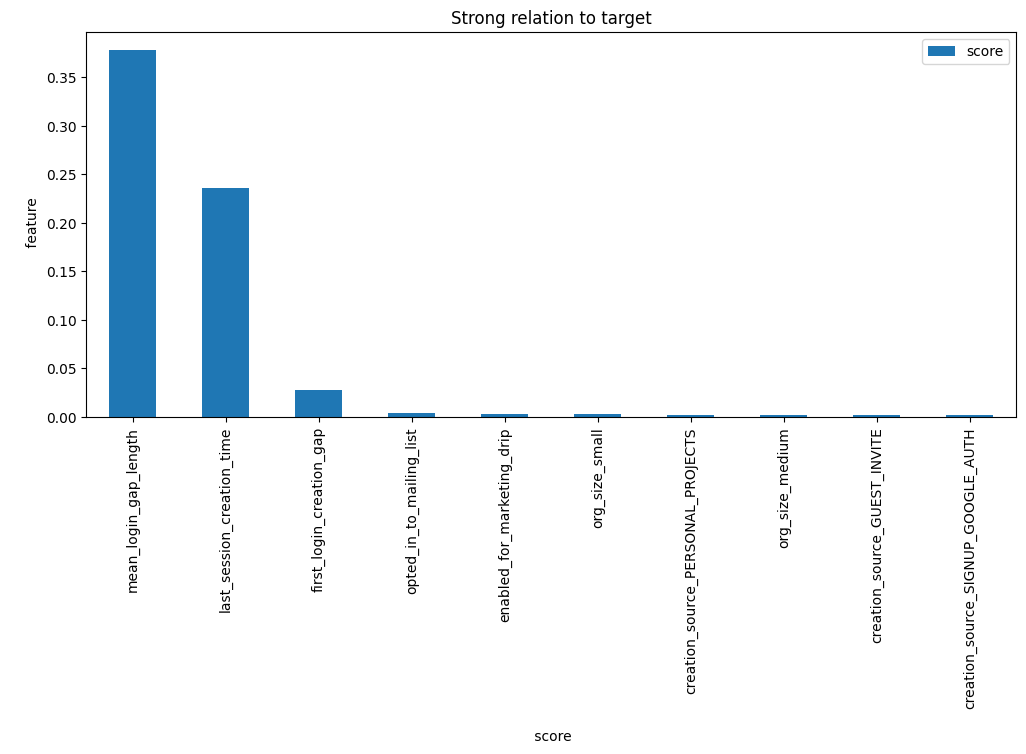

In [115]:
from matplotlib import pyplot as plt

result.plot(kind ="bar", title ="Strong relation to target", x = "feature",y ="score",xlabel="\n score", ylabel="\n feature",figsize=(12,5))
plt.show()

### It is clear that 1.mean_login_gap_length, 2.last_session_creation_time, 3. first_login_creation_gap,4.opted_in_to_mailing_list, 5.enabled_for_marketing_drip, 6.org_size having a strong relation ship to the target . These features are important factors to adopted users.